<a href="https://colab.research.google.com/github/dlguswn3659/AI_Final_Assignment/blob/master/Naver_Trend/Naver_fashion_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import os
import sys
import requests
client_id = "FIdfzEHVHf8313PRsF4D"
client_secret = "O_RYgSTjdl"
# url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
url = "https://openapi.naver.com/v1/vision/celebrity" # 유명인 얼굴인식
files = {'image': open('suzy.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)
else:
    print("Error Code:" + rescode)

{"info":{"size":{"width":620,"height":771},"faceCount":1},"faces":[{"celebrity":{"value":"구혜선","confidence":0.455584}}]}


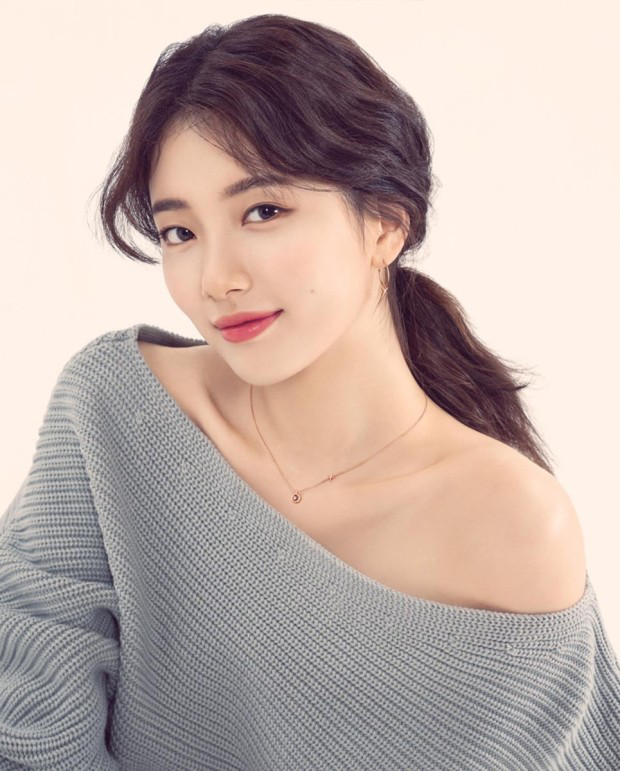

In [73]:
import urllib.request
from PIL import Image, ImageDraw

file_name =  'suzy.jpg'
# image_url = 'https://steemitimages.com/u/ned/avatar'
# urllib.request.urlretrieve(image_url, file_name)
Image.open(file_name)

In [74]:
files = {'image': open(file_name, 'rb')}
url = "https://openapi.naver.com/v1/vision/face" # 얼굴감지
headers = {'X-Naver-Client-Id': client_id, 'X-Naver-Client-Secret': client_secret }
response = requests.post(url,  files=files, headers=headers)
rescode = response.status_code
if(rescode==200):
    print (response.text)

print(response.text)

count = 0

gender = 'm'
age = []

for i in range(0, len(response.text)):
  if response.text[i] == '{':
    count = count + 1
  if count == 6 :
    for j in range(0, 1):
      if response.text[i + 10 + j] != '"':
        gender=response.text[i + 10 + j]
      else :
        break
    count = count + 1
  if count == 8 :
    for j in range(0, 2):
      if response.text[i + 10 + j] != '"':
        age.append(response.text[i + 10 + j])
      else :
        break
    break

age = ''.join(age)

print(gender)
print(age)

  
# body = json.dumps(response.text)

# request = urllib.request.Request(url)
# request.add_header("X-Naver-Client-Id",client_id)
# request.add_header("X-Naver-Client-Secret",client_secret)
# request.add_header("Content-Type","application/json")
# response = urllib.request.urlopen(request, data=body.encode("utf-8"))
# json_obj = json.loads(response.read().decode('utf-8'))

# print(json_obj)

# df = []

# df.append(pd.DataFrame(json_obj['results'][0]['data'])); df[0].columns=['기간','패션의류'];
df.append(pd.DataFrame(json_obj['results'][1]['data'])); df[1].columns=['기간','화장품/미용'];

{"info":{"size":{"width":620,"height":771},"faceCount":1},"faces":[{"roi":{"x":148,"y":165,"width":224,"height":224},"landmark":null,"gender":{"value":"female","confidence":0.999276},"age":{"value":"20~24","confidence":1.0},"emotion":{"value":"neutral","confidence":0.994869},"pose":{"value":"part_face","confidence":0.888854}}]}
{"info":{"size":{"width":620,"height":771},"faceCount":1},"faces":[{"roi":{"x":148,"y":165,"width":224,"height":224},"landmark":null,"gender":{"value":"female","confidence":0.999276},"age":{"value":"20~24","confidence":1.0},"emotion":{"value":"neutral","confidence":0.994869},"pose":{"value":"part_face","confidence":0.888854}}]}
f
20


In [75]:
#-*- coding: utf-8 -*-
import os
import sys
import urllib.request
import json
import pandas as pd
import seaborn as sns; sns.set(style='darkgrid', font='KoPutDOtum', font_scale=1.5)
import matplotlib.pyplot as plt

client_id = "Wcz16fZV6Y_4wZqilPCX"
client_secret = "2TXWghrQrg"

url = "https://openapi.naver.com/v1/datalab/shopping/categories";
# body = "{\"startDate\":\"2017-08-01\",\"endDate\":\"2017-09-30\",\"timeUnit\":\"month\",\"category\":[{\"name\":\"패션의류\",\"param\":[\"50000000\"]},{\"name\":\"화장품/미용\",\"param\":[\"50000002\"]}],\"device\":\"pc\",\"ages\":[\"20\",\"30\"],\"gender\":\"f\"}";

body = {
    'startDate' : '2020-08-21',
    'endDate' : '2020-08-27',
    'timeUnit' : 'date',        # input : [date, week, month]
    'category' : [{'name':'패션의류','param':['50000000']},{'name':'화장품/미용','param':['50000002']}],
    'device' : 'pc',
    'ages' : [age],
    'gender' : gender
}

#params : 50000807=원피스, 

body = json.dumps(body)

print(body)
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
json_obj = json.loads(response.read().decode('utf-8'))

df = []

df.append(pd.DataFrame(json_obj['results'][0]['data'])); df[0].columns=['기간','패션의류'];
df.append(pd.DataFrame(json_obj['results'][1]['data'])); df[1].columns=['기간','화장품/미용'];


print(df[0])
print(df[1])

{"startDate": "2020-08-21", "endDate": "2020-08-27", "timeUnit": "date", "category": [{"name": "\ud328\uc158\uc758\ub958", "param": ["50000000"]}, {"name": "\ud654\uc7a5\ud488/\ubbf8\uc6a9", "param": ["50000002"]}], "device": "pc", "ages": ["20"], "gender": "f"}
           기간       패션의류
0  2020-08-21   72.84012
1  2020-08-22   45.54197
2  2020-08-23   51.34039
3  2020-08-24   91.70307
4  2020-08-25   95.93639
5  2020-08-26  100.00000
           기간    화장품/미용
0  2020-08-21  33.46113
1  2020-08-22  16.20415
2  2020-08-23  19.54806
3  2020-08-24  44.12143
4  2020-08-25  48.72560
5  2020-08-26  43.37031
